In [7]:
#| echo: false
#| include: false
import pandas as pd
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import plotly.express as px
import plotly.offline as pyo
import plotly.tools as tls
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

pio.renderers.default = "plotly_mimetype+notebook_connected"

## Connected Dot Plot

In [66]:
df = pd.read_csv("DM_clean.csv", encoding='UTF-8')
df.head()

,geo,Men,Women,category
0,Albania,6.0,0.0,Academics
1,Austria,5.0,0.0,Academics
2,Belgium,45.0,26.0,Academics
3,Bosnia and Herzegovina,13.0,4.0,Academics
4,Bulgaria,13.0,15.0,Academics


In [70]:
fig = go.Figure()


for category in df['category'].unique():
    df_subset =  df[(df['category']== category )]

    fig.add_trace(go.Scatter(x=df_subset['Men'], y=df_subset['geo'], mode='markers', name='Men', marker_color='blue',  marker_size=10,visible=False))
    fig.add_trace(go.Scatter(x=df_subset['Women'], y=df_subset['geo'], mode='markers', name='Women', marker_color='red', marker_size=10,visible=False))

    if category == 'Academics':
        for i in range(0, len(df_subset)):
            fig.add_shape(type='line',
                        x0 = df_subset['Men'].iloc[i],
                        y0 = i,
                        x1 = df_subset['Women'].iloc[i],
                        y1 = i,
                        line=dict(color='crimson', width = 3,),
                        layer='below')

fig.data[0].visible = True
fig.data[1].visible = True

kind = df['category'].unique()
button = []
for i in range(len(kind)):
    
    button_content = dict(label=kind[i],
                            method="update",
                            args=[{"visible": [False] * len(fig.data)},
                            {"shapes": []}])
    if i == 0:
        button_content['args'][0]['visible'][i] = True
        button_content['args'][0]['visible'][i+1] = True
    else:
        button_content['args'][0]['visible'][i*2] = True
        button_content['args'][0]['visible'][i*2+1] = True

    
    shape = []
    category = df['category'].unique()[i]
    df_subset =  df[(df['category']== category )]
   
    for j in range(len(df_subset)):
        shape_content = dict(
            type='line',
            x0 = df_subset['Men'].iloc[j],
            y0 = j,
            x1 = df_subset['Women'].iloc[j],
            y1 = j,
            line=dict(color='crimson', width = 3,),
            layer='below')
        shape.append(shape_content)

    button_content['args'][1]['shapes'] = shape

    button.append(button_content)


button_height = 0.15
x1_loc = 0.00
y1_loc = 1.15

fig.update_layout(
    # DEFINE A LIST OF THE VARIOUS BUTTONS (STORED AS DICTIONARIES)
    updatemenus = [
        dict(
            buttons= list(button),
            # PLACEMENT AND META DATA FOR THE BUTTON
            direction="down",
            showactive=True,  # HIGHLIGHTS ACTIVE DROPDOWN ITEM OR ACTIVE BUTTON IF TRUE
            pad={"r": 10, "t": 10},  # PADDING
            x=x1_loc,  # POSITION
            y=y1_loc,
            xanchor="left",  # ANCHOR POINT
            yanchor="top"
        )
    ],
    title="Who make decisions?",
    xaxis_title="Headcount",
    #yaxis_title="Country",
    yaxis={"dtick":1},
    margin={"t":0,"b":0},
    height=800
    
)

# SHOW
fig.show()


## Scatter Plot

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

In [71]:
df2 = pd.read_csv("work_clean.csv", encoding='UTF-8')
df2.head()

,Country,Men,Women,Category
0,Australia,304.1,172.0,Paid
1,Austria,364.8,248.8,Paid
2,Belgium,273.7,199.2,Paid
3,Canada,340.5,268.3,Paid
4,China (People's Republic of),390.0,291.0,Paid


In [72]:
df_subset =  df2[(df2['Category']== "Paid")]
df_subset2 =  df2[(df2['Category']== "Unpaid")]

my_range_1 =range(1,len(df_subset.index)+1)
my_range_2 =range(1,len(df_subset2.index)+1)


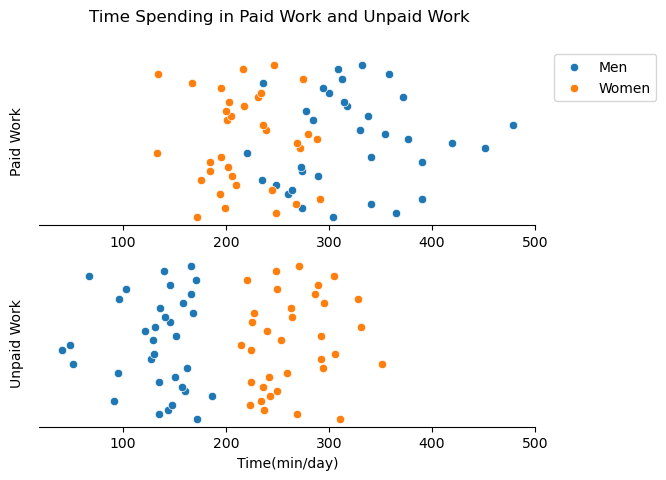

In [75]:
fig, axs = plt.subplots(nrows=2, ncols=1,sharex=True)

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(True) # Keep the frame of the x-axis
    ax.tick_params(left=False)
    ax.set_yticklabels([])

sns.scatterplot(x = df_subset['Men'], y = my_range_1,ax=axs[0],label="Men")
sns.scatterplot(x = df_subset['Women'], y = my_range_1,ax=axs[0],label="Women")
axs[0].tick_params(labelbottom=True)
axs[0].set_xlabel("")
axs[0].set_ylabel("Paid Work")
axs[0].get_legend().remove()

plt.subplot(2, 1, 2)
sns.scatterplot(x = df_subset2['Men'], y = my_range_2,ax=axs[1],label="Men")
sns.scatterplot(x = df_subset2['Women'], y = my_range_2,ax=axs[1],label="Women")
axs[1].set_xlabel("Time(min/day)")
axs[1].set_ylabel("Unpaid Work")
axs[1].get_legend().remove()


fig.legend(labels=['Men', 'Women'],loc='upper right', bbox_to_anchor=(1.1, 0.9))
fig.suptitle('Time Spending in Paid Work and Unpaid Work')

plt.savefig("image/Work.png")
plt.show()